In [ ]:
import kagglehub

path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantdisease


In [2]:
path = "/kaggle/input/plantdisease/PlantVillage"

In [3]:
import os

contents = os.listdir(path)
print("Contents of the dataset directory:", contents)

subdirectories = [name for name in contents if os.path.isdir(os.path.join(path, name))]
print("Plant disease categories (subdirectories):", subdirectories)

Contents of the dataset directory: ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']
Plant disease categories (subdirectories): ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']


In [4]:
print("Though there is no subcategories.")

Though there is no subcategories.


In [5]:
image_counts = {}
for category in subdirectories:
    category_path = os.path.join(path, category)
    num_images = len([name for name in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, name))])
    image_counts[category] = num_images

for category, count in image_counts.items():
    print(f"{category}: {count}")

Pepper__bell___Bacterial_spot: 997
Potato___healthy: 152
Tomato_Leaf_Mold: 952
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209
Tomato_Bacterial_spot: 2127
Tomato_Septoria_leaf_spot: 1771
Tomato_healthy: 1591
Tomato_Spider_mites_Two_spotted_spider_mite: 1676
Tomato_Early_blight: 1000
Tomato__Target_Spot: 1404
Pepper__bell___healthy: 1478
Potato___Late_blight: 1000
Tomato_Late_blight: 1909
Potato___Early_blight: 1000
Tomato__Tomato_mosaic_virus: 373


In [10]:
import matplotlib.pyplot as plt
import cv2
import os

selected_categories = list(image_counts.keys())[:5]
selected_categories

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot']

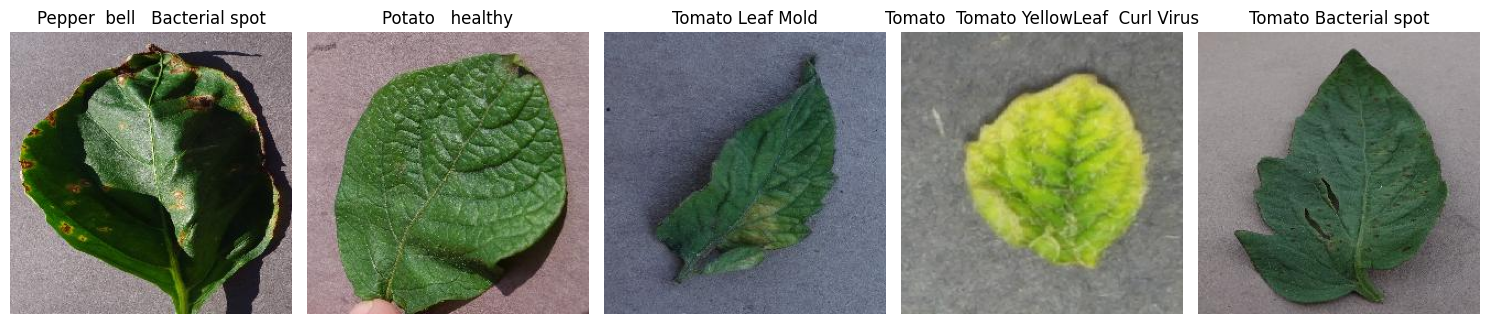

In [11]:
plt.figure(figsize=(15, 5))
for i, category in enumerate(selected_categories):
    category_path = os.path.join(path, category)
    image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    if image_files:
        sample_image_path = os.path.join(category_path, image_files[0])
        img = cv2.imread(sample_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(selected_categories), i + 1)
        plt.imshow(img_rgb)
        plt.title(category.replace('_', ' '))
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import os

image_dimensions = {}
sample_size = 10 

for category in subdirectories:
    category_path = os.path.join(path, category)
    image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

    dimensions = []
    for i in range(min(sample_size, len(image_files))):
        image_path = os.path.join(category_path, image_files[i])
        img = cv2.imread(image_path)
        if img is not None:
            dimensions.append(img.shape[:2]) 
    image_dimensions[category] = dimensions


uniform_dimensions = True
first_dimension = None

print("Image Dimensions Analysis:")
for category, dims in image_dimensions.items():
    if dims:
        print(f"  Category: {category}")
        unique_dims = set(dims)
        if len(unique_dims) > 1:
            uniform_dimensions = False
            print(f"    Dimensions are not uniform. Observed dimensions: {unique_dims}")
        else:
            print(f"    Dimensions are uniform: {unique_dims.pop()}")
            if first_dimension is None:
                first_dimension = dims[0]
            elif first_dimension != dims[0]:
                uniform_dimensions = False

if uniform_dimensions:
    print("\nAll sampled images have uniform dimensions across all categories.")
else:
    print("\nSampled images have varying dimensions across categories or within categories.")

Image Dimensions Analysis:
  Category: Pepper__bell___Bacterial_spot
    Dimensions are uniform: (256, 256)
  Category: Potato___healthy
    Dimensions are uniform: (256, 256)
  Category: Tomato_Leaf_Mold
    Dimensions are uniform: (256, 256)
  Category: Tomato__Tomato_YellowLeaf__Curl_Virus
    Dimensions are uniform: (256, 256)
  Category: Tomato_Bacterial_spot
    Dimensions are uniform: (256, 256)
  Category: Tomato_Septoria_leaf_spot
    Dimensions are uniform: (256, 256)
  Category: Tomato_healthy
    Dimensions are uniform: (256, 256)
  Category: Tomato_Spider_mites_Two_spotted_spider_mite
    Dimensions are uniform: (256, 256)
  Category: Tomato_Early_blight
    Dimensions are uniform: (256, 256)
  Category: Tomato__Target_Spot
    Dimensions are uniform: (256, 256)
  Category: Pepper__bell___healthy
    Dimensions are uniform: (256, 256)
  Category: Potato___Late_blight
    Dimensions are uniform: (256, 256)
  Category: Tomato_Late_blight
    Dimensions are uniform: (256, 256

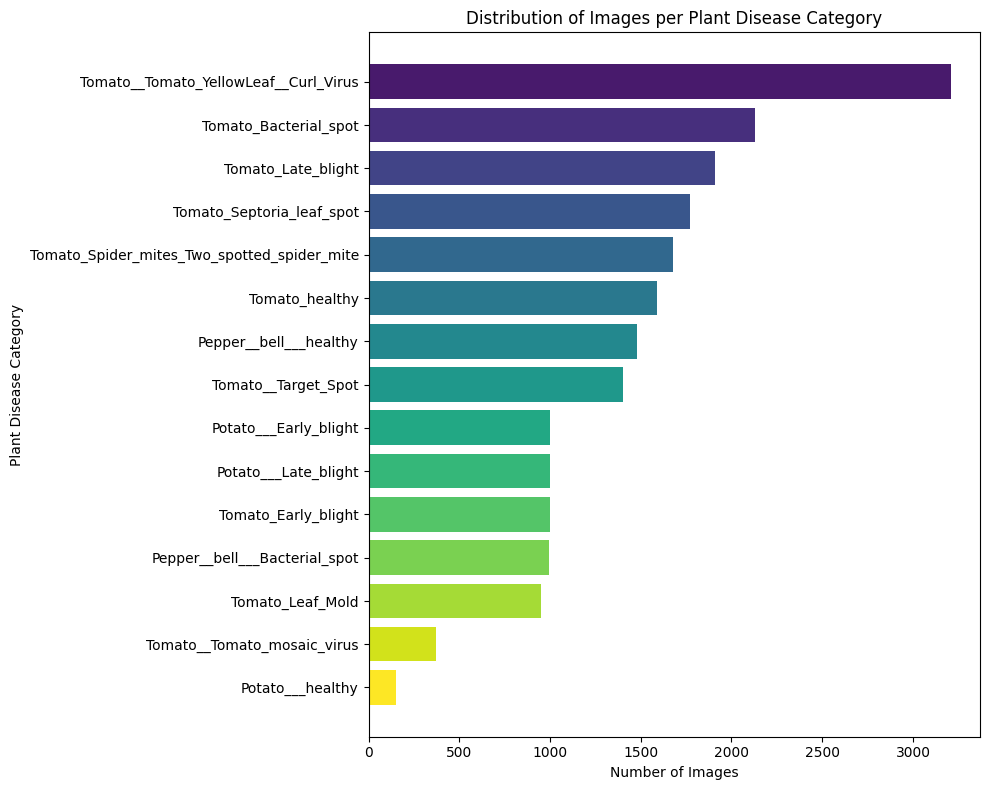

In [13]:
sorted_items = sorted(image_counts.items(), key=lambda x: x[1])
categories, counts = zip(*sorted_items)

plt.figure(figsize=(10, 8))
bars = plt.barh(categories, counts, color=plt.cm.viridis_r(
    [i/len(counts) for i in range(len(counts))])
)

plt.xlabel("Number of Images")
plt.ylabel("Plant Disease Category")
plt.title("Distribution of Images per Plant Disease Category")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset is organized into subdirectories, with each subdirectory representing a specific plant disease category or a healthy plant category.
*   The dataset contains varying numbers of images per category, with `Tomato__Tomato_YellowLeaf__Curl_Virus` and `Tomato_Bacterial_spot` having significantly more images than categories like `Potato___healthy` and `Tomato__Tomato_mosaic_virus`.
*   Sampled images across all categories were found to have uniform dimensions of 256x256 pixels.